In [ ]:
#Reading and skipping bad lines which can cause errors
import pandas as pd

data = pd.read_csv('/content/Fraud.csv', on_bad_lines='skip')

data.head()

<ipython-input-8-a42f4d25fd3c>:4: DtypeWarning: Columns (2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Fraud.csv', on_bad_lines='skip')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
#Thus Null values are less than 5%
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,2
newbalanceOrig,3
nameDest,5
oldbalanceDest,5
newbalanceDest,7
isFraud,10


In [ ]:
#Data is very large to train
data.shape

(6547090, 11)

In [ ]:
#droppin null values beacues null values were less 4%
data.dropna(inplace=True)
data.isnull().sum()
data.shape


(6547079, 11)

In [ ]:
#idenfying outliers
data.describe()

,step,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.547079e+06,6.547079e+06,6.547079e+06,6.547079e+06,6.547079e+06
mean,2.544217e+02,1.102285e+06,1.271963e+06,1.553823e-03,3.818497e-06
std,1.547499e+02,3.419033e+06,1.187491e+08,3.938792e-02,1.954094e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.570000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.510000e+02,1.312745e+05,2.131423e+05,0.000000e+00,0.000000e+00
75%,3.490000e+02,9.404984e+05,1.108317e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,3.560159e+08,3.037011e+11,1.000000e+00,1.000000e+00


In [ ]:
#not valuale target column better to drop this column
data['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,6547054
1.0,25


In [ ]:
#Imabalanced dataset
data['isFraud'].value_counts()

,count
isFraud,
0.0,6536906
1.0,10173


In [ ]:
#Balancing the values is or not fraud values

fraud = data[data['isFraud'] == 1]
not_fraud = data[data['isFraud'] == 0]

# Downsample the majority class (not_fraud)
not_fraud_downsampled = not_fraud.sample(n=len(fraud), random_state=42) # Match the number of fraud cases

# Combine the downsampled majority class with the minority class
balanced_data = pd.concat([fraud, not_fraud_downsampled])

# Shuffle the data
data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution in the balanced dataset
print(balanced_data['isFraud'].value_counts())

isFraud
1.0    10173
0.0    10173
Name: count, dtype: int64


In [ ]:
#dropping invaluable columns

data = data.drop(columns=['step','nameOrig','nameDest','isFlaggedFraud'])

In [ ]:
#data after filter
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,CASH_OUT,10000000.0,10000000.0,0.0,62895.13,10062895.13,1.0
1,CASH_IN,222210.22,2045064.72,2267274.95,656144.47,433934.24,0.0
2,TRANSFER,161147.38,161147.38,0.0,0.00,0.00,1.0
3,CASH_OUT,5455965.86,5455965.86,0.0,0.00,5455965.86,1.0
4,CASH_IN,103043.07,5183214.52,5286257.58,1541049.75,1438006.68,0.0


In [ ]:
#tranforming Type into labling encoding for the better accuracy for the model
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['type'] = label_encoder.fit_transform(data['type'])

data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,10000000.0,10000000.0,0.0,62895.13,10062895.13,1.0
1,0,222210.22,2045064.72,2267274.95,656144.47,433934.24,0.0
2,4,161147.38,161147.38,0.0,0.00,0.00,1.0
3,1,5455965.86,5455965.86,0.0,0.00,5455965.86,1.0
4,0,103043.07,5183214.52,5286257.58,1541049.75,1438006.68,0.0


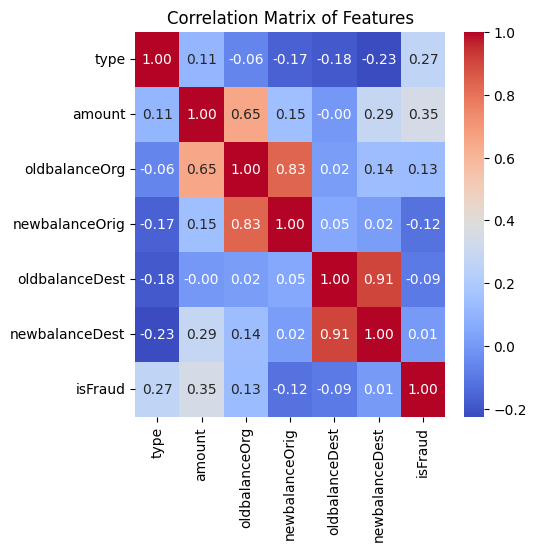

In [ ]:
#Correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
#import the RamndomClassifier model and thus it is a classification problem thus it has best accuracy among other models

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = data.drop('isFraud', axis=1)
y = data['isFraud']


In [ ]:
#Splitting and fitting the model for train dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



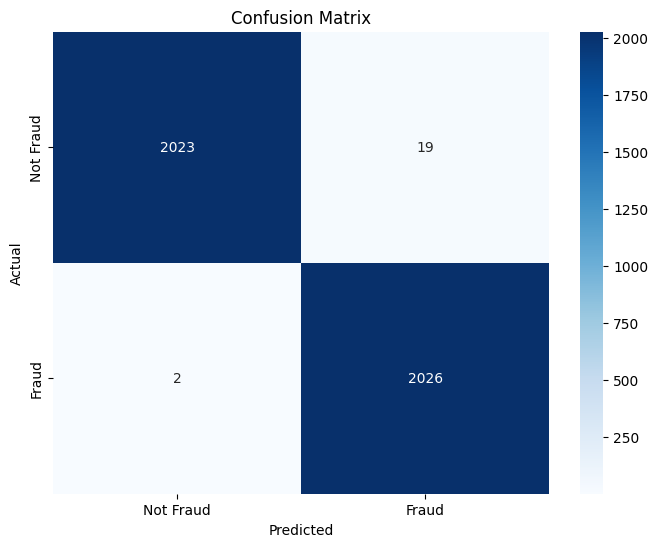

In [ ]:
#False values are very less

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate precision score

from sklearn.metrics import precision_score, r2_score

precision = precision_score(y_test, y_pred)
print(f"Precision Score: {precision}")


Precision Score: 0.9907090464547678


In [ ]:
# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9948402948402948
